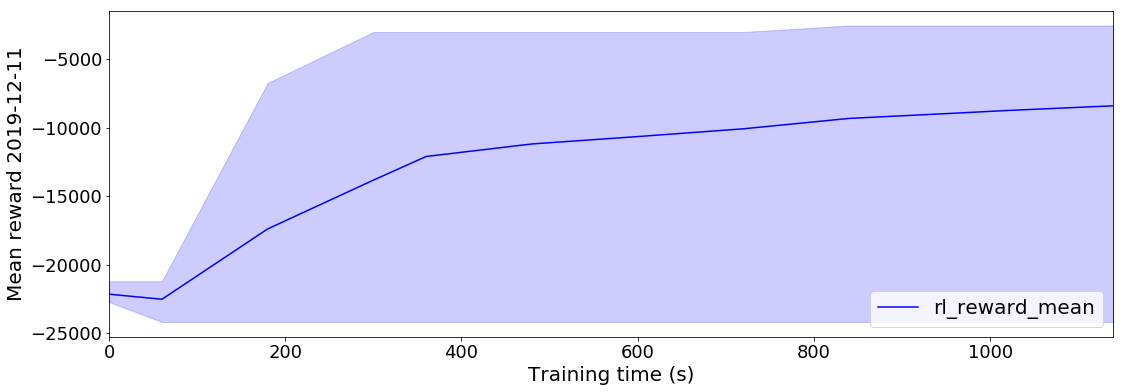

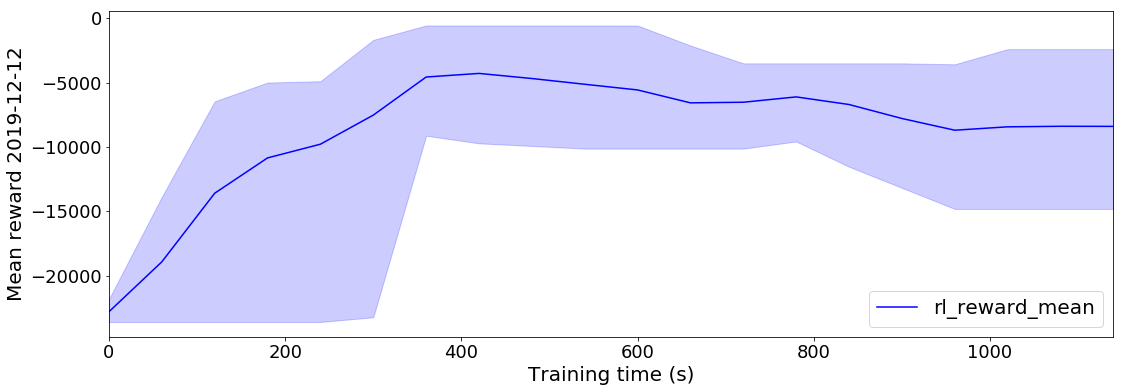

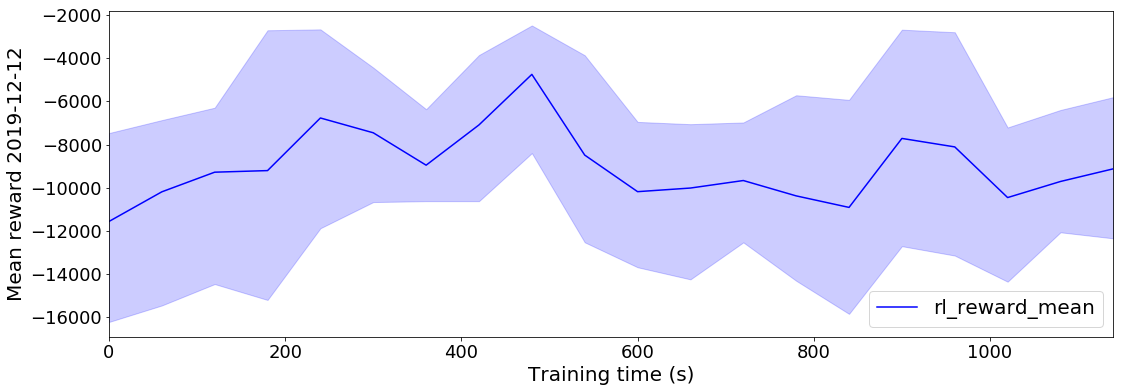

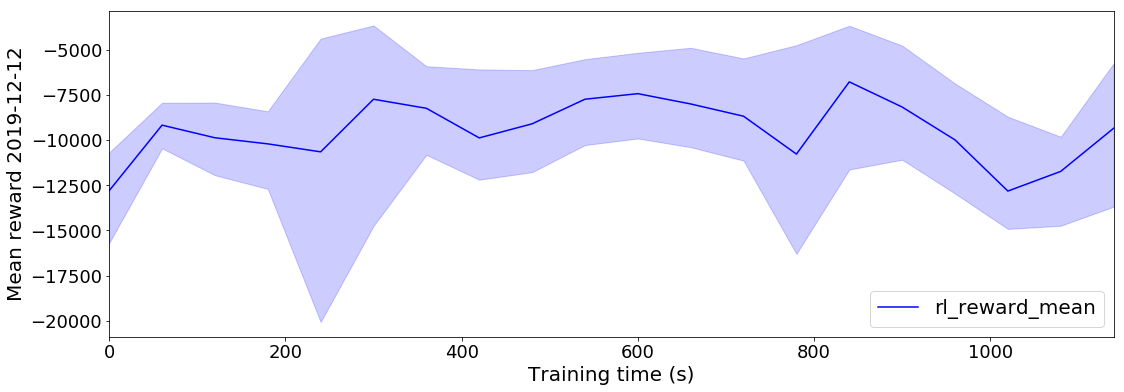

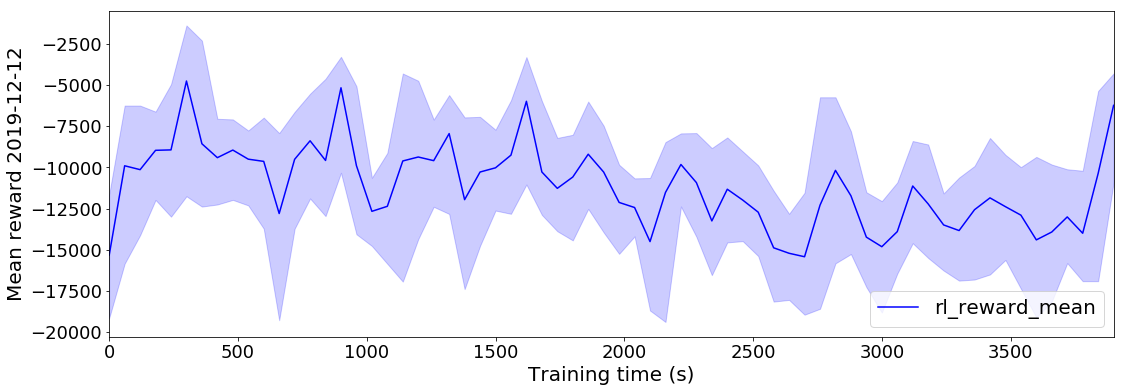

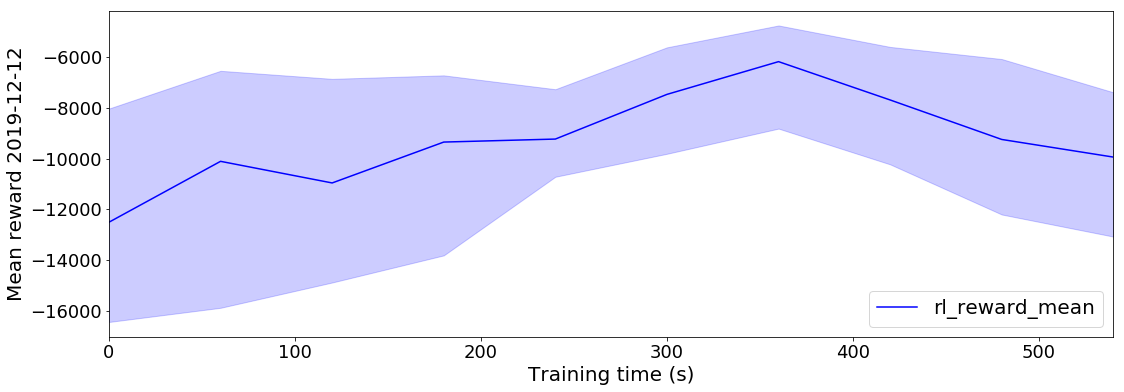

In [7]:
%matplotlib inline
from sagemaker.analytics import TrainingJobAnalytics

for job in ['vrp-oktank-logistics-2019-12-11-21-48-18-587',
            'vrp-oktank-logistics-2019-12-12-15-28-45-588',
           'vrp-oktank-logistics-2019-12-12-15-55-46-429',
           'vrp-oktank-logistics-2019-12-12-16-25-57-755',
           'vrp-oktank-logistics-2019-12-12-21-45-21-053',
           'vrp-oktank-logistics-2019-12-12-22-50-04-150'] :
    
    df = TrainingJobAnalytics(job, ['episode_reward_mean']).dataframe()
    df_min = TrainingJobAnalytics(job, ['episode_reward_min']).dataframe()
    df_max = TrainingJobAnalytics(job, ['episode_reward_max']).dataframe()
    df['rl_reward_mean'] = df['value']
    df['rl_reward_min'] = df_min['value']
    df['rl_reward_max'] = df_max['value']
    num_metrics = len(df)

    if num_metrics == 0:
        print("No algorithm metrics found in CloudWatch")
    else:
        plt = df.plot(x='timestamp', y=['rl_reward_mean'], figsize=(18,6), fontsize=18, legend=True, style='-', color=['b','r','g'])
        plt.fill_between(df.timestamp, df.rl_reward_min, df.rl_reward_max, color='b', alpha=0.2)
        plt.set_ylabel('Mean reward {}'.format(job[-23:-13]), fontsize=20)
        plt.set_xlabel('Training time (s)', fontsize=20)
        plt.legend(loc=4, prop={'size': 20})